# Gaussian Proess Exercise on a CSV dataset and sampling from it later. 

In [1]:
import numpy as np
import matplotlib
# matplotlib.rcParams['figure.figsize']=(4,3)
# %matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt
import seaborn as sns
# plt.style.use('dark_background')
import GPy

## 1. Import the dataset

In [2]:
# Import datasets as pandas
# from scipy.io import loadmat
import pandas as pd
# data_set = loadmat("Mark_4sec_CA1PSD_ISO_freqamp_020619.mat")
CA1_df = pd.read_csv("Mark_4sec_CA3PSD_ISO_freqamp_020619.csv")
CA1_df

Stim_1  Stim_2         Xk0_1         Xk0_2         Xk0_3         Xk0_4  \
0        17      30  1.066899e-07  4.362881e-09  6.410145e-10  6.153980e-10   
1        42      40  9.644295e-08  1.100460e-09  3.698362e-10  1.196834e-10   
2        35      30  9.664707e-08  1.686739e-09  1.383835e-09  9.779574e-10   
3        23      50  9.750570e-08  1.306145e-09  3.598379e-10  2.804073e-10   
4        42      50  1.020247e-07  5.254584e-09  4.163858e-09  1.331331e-09   
..      ...     ...           ...           ...           ...           ...   
379      29      40  9.438211e-08  8.953157e-10  5.325697e-10  4.034846e-10   
380      17      50  9.503613e-08  1.012707e-09  3.889901e-10  2.982987e-10   
381      42      30  9.467551e-08  1.790015e-09  1.131069e-09  1.480148e-09   
382       7      50  9.344372e-08  8.772011e-10  4.970744e-10  5.333557e-10   
383      23      50  9.561532e-08  2.005949e-09  3.758392e-10  4.841670e-10   

            Xk0_5         Xk0_6         Xk0_7         Xk0_8  ...  \
0    4.952555e-10  3.655776e-10  6.689563e-10  4.548710e-10  ...   
1    1.135362e-10  1.471786e-10  3.404247e-10  4.498116e-10  ...   
2    2.740501e-10  2.981321e-10  3.574340e-10  4.000314e-10  ...   
3    2.125693e-10  2.026804e-10  2.883272e-10  2.668982e-10  ...   
4    4.225174e-10  6.844851e-10  1.042377e-09  2.894596e-10  ...   
..            ...           ...           ...           ...  ...   
379  3.847985e-10  7.124458e-10  6.019659e-10  5.045601e-10  ...   
380  2.975021e-10  3.704936e-10  7.720063e-10  5.561578e-10  ...   
381  1.404767e-09  1.095754e-09  7.758978e-10  1.129526e-09  ...   
382  4.927356e-10  7.601632e-10  6.495486e-10  4.785051e-10  ...   
383  1.121483e-09  7.579907e-10  3.269754e-10  2.652351e-10  ...   

           Xk1_91        Xk1_92        Xk1_93        Xk1_94        Xk1_95  \
0    9.614848e-13  5.535816e-13  3.549981e-13  2.959776e-13  6.462898e-13   
1    1.350018e-12  1.003581e-12  7.857398e-13  1.141451e-12  8.279703e-13   
2    1.167509e-12  7.559837e-13  1.333016e-12  1.637356e-12  2.252303e-12   
3    1.366467e-12  2.443904e-12  2.535353e-12  1.229021e-12  9.005429e-13   
4    8.403170e-13  5.947037e-13  7.975147e-13  1.019247e-12  1.142941e-12   
..            ...           ...           ...           ...           ...   
379  3.915490e-13  3.560932e-13  3.947136e-13  3.543831e-13  5.283461e-13   
380  3.057599e-13  3.755007e-13  3.242915e-13  2.136803e-13  2.412199e-13   
381  5.972925e-13  7.388474e-13  4.952310e-13  4.230530e-13  3.500203e-13   
382  2.582216e-13  2.178556e-13  1.779925e-13  2.533067e-13  1.734665e-13   
383  3.321941e-13  3.849869e-13  4.204187e-13  5.121107e-13  5.898898e-13   

           Xk1_96        Xk1_97        Xk1_98        Xk1_99       Xk1_100  
0    9.176671e-13  7.071067e-13  7.704253e-13  1.278144e-12  6.975427e-13  
1    1.007723e-12  1.160121e-12  9.708206e-13  5.918814e-13  7.502253e-13  
2    9.505286e-13  1.173716e-12  1.199101e-12  8.871386e-13  9.026766e-13  
3    1.069436e-12  9.512349e-13  7.234959e-13  1.241802e-12  8.649545e-13  
4    1.185287e-12  9.356042e-13  1.085042e-12  8.461304e-13  4.135749e-13  
..            ...           ...           ...           ...           ...  
379  2.827943e-13  3.592653e-13  4.569682e-13  3.788961e-13  4.503580e-13  
380  2.010544e-13  2.495399e-13  5.407236e-13  3.228808e-13  3.071144e-13  
381  3.113596e-13  4.071015e-13  6.988792e-13  6.040085e-13  3.130020e-13  
382  1.106245e-13  1.546325e-13  3.050555e-13  3.590836e-13  3.578827e-13  
383  5.522000e-13  5.559997e-13  3.924049e-13  3.757231e-13  3.879397e-13  

[384 rows x 202 columns]

In [3]:
CA1_df.describe()

Stim_1      Stim_2         Xk0_1         Xk0_2         Xk0_3  \
count  384.000000  384.000000  3.840000e+02  3.840000e+02  3.840000e+02   
mean    21.125000   25.000000  9.876748e-08  1.483792e-09  7.216810e-10   
std     12.630313   17.100532  2.344670e-08  9.873200e-10  4.625125e-10   
min      5.000000    0.000000  9.224978e-08  4.018869e-10  1.779852e-10   
25%     10.000000   10.000000  9.467907e-08  7.756680e-10  3.950088e-10   
50%     20.000000   25.000000  9.589994e-08  1.195470e-09  5.937907e-10   
75%     30.500000   40.000000  9.758217e-08  1.902026e-09  9.339533e-10   
max     42.000000   50.000000  4.962646e-07  6.308812e-09  4.163858e-09   

              Xk0_4         Xk0_5         Xk0_6         Xk0_7         Xk0_8  \
count  3.840000e+02  3.840000e+02  3.840000e+02  3.840000e+02  3.840000e+02   
mean   5.297563e-10  4.963279e-10  5.403563e-10  5.392557e-10  4.841397e-10   
std    2.804616e-10  2.457717e-10  2.871590e-10  2.926409e-10  2.888415e-10   
min    1.196834e-10  8.558949e-11  5.937738e-11  5.033034e-11  3.842182e-11   
25%    3.139932e-10  3.081002e-10  3.292297e-10  3.149414e-10  2.533371e-10   
50%    4.923716e-10  4.553629e-10  5.000206e-10  5.065640e-10  4.327971e-10   
75%    6.661477e-10  6.518402e-10  7.017185e-10  7.320325e-10  6.748503e-10   
max    2.628835e-09  1.482603e-09  1.520968e-09  1.659829e-09  1.703842e-09   

       ...        Xk1_91        Xk1_92        Xk1_93        Xk1_94  \
count  ...  3.840000e+02  3.840000e+02  3.840000e+02  3.840000e+02   
mean   ...  6.546182e-13  6.091531e-13  5.459146e-13  5.131811e-13   
std    ...  3.599384e-13  3.487042e-13  3.449344e-13  3.213658e-13   
min    ...  1.292999e-13  1.297780e-13  6.882206e-14  6.250159e-14   
25%    ...  3.921124e-13  3.629012e-13  3.203597e-13  2.946486e-13   
50%    ...  5.770754e-13  5.490138e-13  4.637024e-13  4.273831e-13   
75%    ...  8.488597e-13  7.562070e-13  6.810909e-13  6.549298e-13   
max    ...  2.595211e-12  2.443904e-12  2.535353e-12  2.213978e-12   

             Xk1_95        Xk1_96        Xk1_97        Xk1_98        Xk1_99  \
count  3.840000e+02  3.840000e+02  3.840000e+02  3.840000e+02  3.840000e+02   
mean   4.991757e-13  4.661958e-13  4.738421e-13  4.716295e-13  4.689914e-13   
std    2.975148e-13  2.591702e-13  2.692950e-13  2.528458e-13  2.351999e-13   
min    7.442178e-14  1.030722e-13  1.097927e-13  1.147326e-13  1.041554e-13   
25%    2.972690e-13  2.745972e-13  2.990072e-13  3.003718e-13  3.096119e-13   
50%    4.251277e-13  4.168663e-13  3.992897e-13  4.026246e-13  4.029964e-13   
75%    6.422870e-13  5.835571e-13  5.901386e-13  5.815182e-13  5.953072e-13   
max    2.458930e-12  2.006133e-12  2.530077e-12  1.943353e-12  1.592802e-12   

            Xk1_100  
count  3.840000e+02  
mean   4.309777e-13  
std    2.110681e-13  
min    1.374316e-13  
25%    2.838366e-13  
50%    3.855960e-13  
75%    5.269147e-13  
max    1.795189e-12  

[8 rows x 202 columns]

In [17]:
np.r_[0:2, 32:52]

array([ 0,  1, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51])

## 2. Finding the stimulation frequency and amplitude and pre stimulus gamma columns 

In [5]:
# gamma = np.arange(32,51)
# print(gamma)
print(CA1_df.iloc[1, np.r_[0:2, 33:52]])

Stim_1    4.200000e+01
Stim_2    4.000000e+01
Xk0_32    3.920551e-11
Xk0_33    2.185532e-11
Xk0_34    1.065976e-11
Xk0_35    1.248434e-11
Xk0_36    2.544466e-11
Xk0_37    1.974901e-11
Xk0_38    7.941763e-12
Xk0_39    1.519301e-11
Xk0_40    1.555842e-11
Xk0_41    1.090195e-11
Xk0_42    8.529903e-12
Xk0_43    7.444033e-12
Xk0_44    3.461845e-12
Xk0_45    6.004862e-12
Xk0_46    1.083304e-11
Xk0_47    7.732998e-12
Xk0_48    5.337480e-12
Xk0_49    8.791972e-12
Xk0_50    5.464634e-12
Name: 1, dtype: float64


In [6]:
# sum of pre stimulation gamma

data = np.sum(CA1_df.iloc[:, 33:52], axis=1)
sum_preStim_gamma = pd.DataFrame(data=data, columns=['sum_preStim_gamma'])
sum_preStim_gamma = sum_preStim_gamma*1e10
np.shape(sum_preStim_gamma)
sum_preStim_gamma

sum_preStim_gamma
0             3.266571
1             2.425945
2             3.117866
3             2.868627
4             3.521665
..                 ...
379           1.268502
380           1.239859
381           1.880050
382           1.199899
383           1.343332

[384 rows x 1 columns]

## 3. Select the gamma freq. stimulations

CA1_df_gamma = CA1_df[CA1_df['Stim_1']>32]
CA1_df_gamma

In [7]:
# calculate mean psd for Xk0 and Xk1
# _, Y = CA1_df_gamma.iloc[:, 2:].mean(axis=1)
# select Kx1_32:50 are column? 
Y = np.sum(CA1_df.iloc[:, 133:152],axis=1)
print(np.shape(Y))
# Y.reset_index(drop=True, inplace=True)
Y_reshape =Y[:, np.newaxis]
Y_reshape = Y_reshape*1e10
print(Y_reshape[0:5])
print(np.shape(Y_reshape))

(384,)
[[36.44022473]
 [29.52148839]
 [36.13920654]
 [16.68010369]
 [28.54172459]]
(384, 1)


 C:\Users\sinad\AppData\Local\Temp\ipykernel_40612\3871177562.py:7: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [8]:
X = CA1_df.iloc[:,  0:2]
X_preStim_gamma = X.join(sum_preStim_gamma)
# pd.concat(X, sum_preStim_gamma)
X_preStim_gamma

Stim_1  Stim_2  sum_preStim_gamma
0        17      30           3.266571
1        42      40           2.425945
2        35      30           3.117866
3        23      50           2.868627
4        42      50           3.521665
..      ...     ...                ...
379      29      40           1.268502
380      17      50           1.239859
381      42      30           1.880050
382       7      50           1.199899
383      23      50           1.343332

[384 rows x 3 columns]

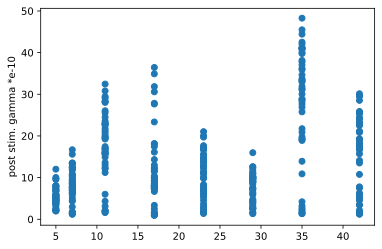

In [9]:
plt.scatter(X_preStim_gamma['Stim_1'],Y_reshape)
plt.ylabel('post stim. gamma *e-10');

In [10]:
X_preStim_gamma.describe()

Stim_1      Stim_2  sum_preStim_gamma
count  384.000000  384.000000         384.000000
mean    21.125000   25.000000           2.171338
std     12.630313   17.100532           1.016536
min      5.000000    0.000000           0.813800
25%     10.000000   10.000000           1.522623
50%     20.000000   25.000000           1.923705
75%     30.500000   40.000000           2.574274
max     42.000000   50.000000          10.999129

## 4. Defining Kernel, initializing a GP Regression model, heatmap plotting, and optimizing 

X.reset_index(drop=True, inplace=True)
X

In [11]:
# define kernel
ker = GPy.kern.Matern52(input_dim=3, variance=3., lengthscale=2.,ARD=True) + GPy.kern.White(3)

In [12]:
# create simple GP model
m = GPy.models.GPRegression(X_preStim_gamma,Y_reshape,ker)
display(m)

 C:\Users\sinad\anaconda3\envs\GP_env\lib\site-packages\GPy\plotting\matplot_dep\plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


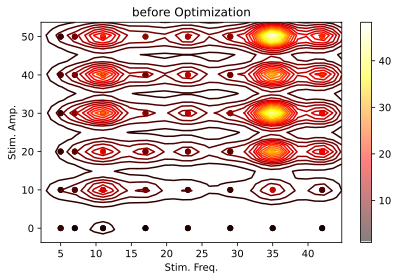

In [13]:
# matplotlib.use("Agg")
GPy.plotting.change_plotting_library("matplotlib")
# GPy.plotting.change_plotting_library('plotly')
fig1 = m.plot(visible_dims=[0,1],legend=False, xlabel='Stim. Freq.', ylabel='Stim. Amp.',
              title="before Optimization");
display(m);
ax = plt.gca()
PCM = ax.get_children()[0]
plt.colorbar(PCM, ax=ax);

In [14]:
# optimize and plot
m.optimize(messages=True,max_f_eval = 1000);

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s19  0002   3.186270e+03   3.204701e+05 
    02s25  0018   1.117825e+03   2.119331e-01 
    04s86  0034   1.111442e+03   3.171993e-09 
Runtime:     04s86
Optimization status: Converged



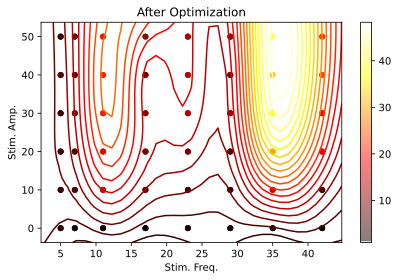

In [15]:
figure = m.plot(visible_dims=[0,1], legend=False, xlabel='Stim. Freq.' , ylabel='Stim. Amp.', title='After Optimization');
# display(GPy.plotting.show(figure, filename='basic_gp_regression_notebook_2d'))
display(m)
ax = plt.gca()
PCM = ax.get_children()[0]
plt.colorbar(PCM, ax=ax)


## 5. Conditioning on one Standard Deviation minus and plus the median preStim gamma

### 5.1 Sampling One Std. Dev. minus the median

(384, 1)


Text(0, 0.5, 'Sum PreStim Gamma')

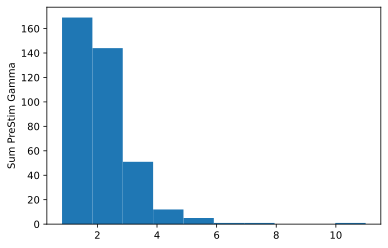

In [16]:
# Conditioning on One Std. Dev. minus the median of preStim gamma: 
# Plotting the histogram of the sum of pre stim. gamma to see the distribution.
print(np.shape(sum_preStim_gamma))
plt.hist(sum_preStim_gamma, bins=10)
plt.ylabel("Sum PreStim Gamma")

In [18]:
median_sum_preStim_gamma = np.median(sum_preStim_gamma)
median_sum_preStim_gamma

1.9237054419037056

In [19]:
SD_sum_preStim_gamma = np.std(sum_preStim_gamma)
SD_sum_preStim_gamma

sum_preStim_gamma    1.015211
dtype: float64

In [20]:
OneSD_minus_sum_preStim_gamma = np.empty((100))

OneSD_minus_sum_preStim_gamma[:] = median_sum_preStim_gamma - SD_sum_preStim_gamma
OneSD_minus_sum_preStim_gamma[0]

0.9084939681688873

### 5.4: sampling one Std Dev plus median

In [21]:
OneSD_plus_sum_preStim_gamma = np.empty((100))

OneSD_plus_sum_preStim_gamma[:] = median_sum_preStim_gamma + SD_sum_preStim_gamma
OneSD_plus_sum_preStim_gamma[0]

2.938916915638524

In [22]:
rand_freq_1d = np.random.choice([5,7,11,17, 23, 35, 42], size=(100))
rand_freq_1d_sorted = np.sort(rand_freq_1d)
# np.shape(rand_freq)
print(rand_freq_1d_sorted[0:3])
rand_amp_1d = np.random.choice([10,20,30,40,50], size=(100))
rand_amp_1d_sorted = np.sort(rand_amp_1d)
print(rand_amp_1d_sorted[0:3])
np.shape(rand_amp_1d_sorted)

[5 5 5]
[10 10 10]


(100,)

In [23]:
testX = np.array([rand_freq_1d_sorted, rand_amp_1d_sorted, OneSD_minus_sum_preStim_gamma]) #52 , 50
print(np.shape(testX))
testX = np.transpose(testX)
print(testX[98:99,0:3])
np.shape(testX)

(3, 100)
[[42.         50.          0.90849397]]


(100, 3)

In [24]:
testX_plus = np.array([rand_freq_1d_sorted, rand_amp_1d_sorted, OneSD_plus_sum_preStim_gamma]) #52 , 50
print(np.shape(testX_plus))
testX_plus = np.transpose(testX_plus)
print(testX_plus[0:2,0:3])
np.shape(testX_plus)

(3, 100)
[[ 5.         10.          2.93891692]
 [ 5.         10.          2.93891692]]


(100, 3)

In [25]:
posteriorTestY = np.empty((100))
simY  = np.empty((100))
simMse = np.empty((100))

posteriorTestY = m.posterior_samples_f(testX, full_cov=True, size=1)[:,0,0]
    # print(np.shape(m.predict(testX)))
simY, simMse = m.predict(testX)

print("mean is: \n",simY[0],"\n\n Variance is: \n", simMse[0])
# posteriorTestY
print(np.shape(posteriorTestY),'\n',posteriorTestY[0:10])
print(np.shape(simY),'\n', np.shape(simMse))

mean is: 
 [4.23546867] 

 Variance is: 
 [15.28586266]
(100,) 
 [ 0.71687928  7.07078769  0.92203283 -0.13416013  1.31401623  2.20104903
  4.4264582   2.18882306 13.51431813  7.51750957]
(100, 1) 
 (100, 1)


In [27]:
median_posteriorTestY = np.median(posteriorTestY)
FirstQT_posteriorTestY = np.quantile(posteriorTestY, 0.25)
ThirdQT_posteriorTestY = np.quantile(posteriorTestY, 0.75)
print('median:' , median_posteriorTestY, '\n', 
      '1st QT: ', FirstQT_posteriorTestY, '\n', 
      '3rd QT: ', ThirdQT_posteriorTestY)

median: 15.102110559615278 
 1st QT:  10.40530362096984 
 3rd QT:  23.30535385460677


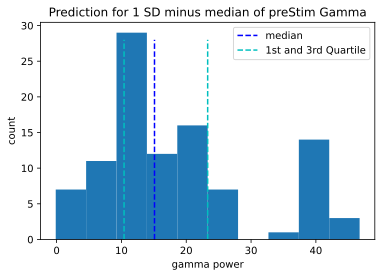

In [42]:
n, bins, patches = plt.hist(posteriorTestY, bins=10)
# print(n)
max_n = int(max(n))
med_predict = np.empty(max_n)
med_predict[:] = median_posteriorTestY
Q1_predict = np.empty(max_n)
Q1_predict[:] = FirstQT_posteriorTestY
Q3_predict = np.empty(max_n)
Q3_predict[:] = ThirdQT_posteriorTestY

plt.plot(med_predict, np.arange(0,max_n),'b--')
plt.plot(Q1_predict, np.arange(0,max_n),'--c')
plt.plot(Q3_predict, np.arange(0,max_n), '--c')
plt.ylabel("count")
plt.xlabel("gamma power")
plt.legend(["median","1st and 3rd Quartile"])
plt.title('Prediction for 1 SD minus median of preStim Gamma')
plt.show()

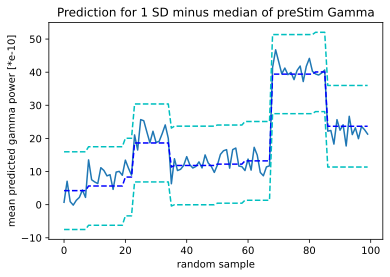

In [43]:
plt.plot(posteriorTestY)
plt.plot(simY[:, 0], 'b--')
plt.plot(simY[:, 0] + 3 * simMse[:, 0]** 0.5, 'c--')
plt.plot(simY[:, 0] - 3 * simMse[:, 0]** 0.5, 'c--')
plt.ylabel('mean predicted gamma power [*e-10]')
plt.xlabel('random sample')
plt.title('Prediction for 1 SD minus median of preStim Gamma')
plt.show()

In [32]:
posteriorTestY_plus = np.empty((100))
simY_plus  = np.empty((100))
simMse_plus = np.empty((100))

posteriorTestY_plus = m.posterior_samples_f(testX_plus, full_cov=True, size=1)[:,0,0]
    # print(np.shape(m.predict(testX)))
simY_plus, simMse_plus = m.predict(testX_plus)

print("mean is: \n",simY_plus[0],"\n\n Variance is: \n", simMse_plus[0])
# posteriorTestY
print(np.shape(posteriorTestY_plus),'\n',posteriorTestY_plus[0])

mean is: 
 [5.9960521] 

 Variance is: 
 [15.20506786]
(100,) 
 5.380376170519625


In [34]:
median_posteriorTestY_plus = np.median(posteriorTestY_plus)
FirstQT_posteriorTestY_plus = np.quantile(posteriorTestY_plus, 0.25)
ThirdQT_posteriorTestY_plus = np.quantile(posteriorTestY_plus, 0.75)
print('median:' , median_posteriorTestY_plus, '\n', 
      '1st QT: ', FirstQT_posteriorTestY_plus, '\n', 
      '3rd QT: ', ThirdQT_posteriorTestY_plus)

median: 17.58650272593946 
 1st QT:  12.367611217571085 
 3rd QT:  25.780406891610227


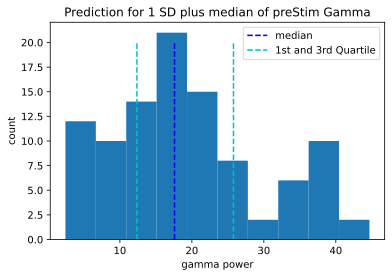

In [40]:
n_plus, bins, patches = plt.hist(posteriorTestY_plus, bins=10)
# print(n)
max_n_plus = int(max(n_plus))
med_predict_plus = np.empty(max_n_plus)
med_predict_plus[:] = median_posteriorTestY_plus
Q1_predict_plus = np.empty(max_n_plus)
Q1_predict_plus[:] = FirstQT_posteriorTestY_plus
Q3_predict_plus = np.empty(max_n_plus)
Q3_predict_plus[:] = ThirdQT_posteriorTestY_plus

plt.plot(med_predict_plus, np.arange(0,max_n_plus),'b--')
plt.plot(Q1_predict_plus, np.arange(0,max_n_plus),'--c')
plt.plot(Q3_predict_plus, np.arange(0,max_n_plus), '--c')
plt.ylabel("count")
plt.xlabel("gamma power")
plt.legend(["median","1st and 3rd Quartile"])
plt.title('Prediction for 1 SD plus median of preStim Gamma')
plt.show()

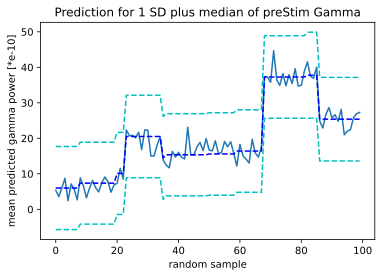

In [41]:
plt.plot(posteriorTestY_plus)
plt.plot(simY_plus[:, 0], 'b--')
plt.plot(simY_plus[:, 0] + 3 * simMse_plus[:, 0]** 0.5, 'c--')
plt.plot(simY_plus[:, 0] - 3 * simMse_plus[:, 0]** 0.5, 'c--')
plt.ylabel('mean predicted gamma power [*e-10]')
plt.xlabel('random sample')
plt.title('Prediction for 1 SD plus median of preStim Gamma')
plt.show()

In [30]:
data_df_1d = pd.DataFrame(data={"freq.":rand_freq_1d_sorted, "amp.":rand_amp_1d_sorted, "predictions":posteriorTestY})
data_df_1d

freq.  amp.  predictions
0       5    10     6.514599
1       5    10     4.642567
2       5    10     4.589846
3       5    10     1.195170
4       5    10     0.303549
..    ...   ...          ...
95     42    50    26.236557
96     42    50    26.666217
97     42    50    22.060291
98     42    50    21.615748
99     42    50    25.954837

[100 rows x 3 columns]

In [31]:
data_df_1d_plus = pd.DataFrame(data={"freq.":rand_freq_1d_sorted, "amp.":rand_amp_1d_sorted, "predictions":posteriorTestY_plus})
data_df_1d_plus

freq.  amp.  predictions
0       5    10     2.935471
1       5    10     1.002080
2       5    10     4.483310
3       5    10     3.498103
4       5    10     9.361545
..    ...   ...          ...
95     42    50    24.891132
96     42    50    26.542801
97     42    50    23.648320
98     42    50    26.390079
99     42    50    27.585771

[100 rows x 3 columns]

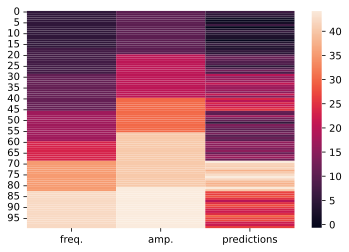

In [32]:
ax = sns.heatmap(data_df_1d.loc[:, ['freq.', 'amp.', 'predictions']], 
                 vmin=np.min(data_df_1d['predictions']), vmax=np.max(data_df_1d['predictions']))
plt.show()

In [33]:
data_df_1d_g = data_df_1d.groupby(["freq.", "amp."])
print(np.shape(data_df_1d_g))
data_df_1d_g.head(10)

(11, 2)


 C:\Users\sinad\anaconda3\envs\GP_env\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning:Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


freq.  amp.  predictions
0       5    10     6.514599
1       5    10     4.642567
2       5    10     4.589846
3       5    10     1.195170
4       5    10     0.303549
..    ...   ...          ...
88     42    50    24.444754
89     42    50    27.452440
90     42    50    25.714927
91     42    50    22.620235
92     42    50    21.725906

[83 rows x 3 columns]

In [34]:
indx = np.arange(100)
z_dim = np.array([indx, data_df_1d["predictions"]])

print(np.shape(z_dim))
z_dim[0,:]
Z = data_df_1d["predictions"]
Z = Z[:, np.newaxis]
print(np.shape(Z))

(2, 100)
(100, 1)


 C:\Users\sinad\AppData\Local\Temp\ipykernel_3344\3283275833.py:7: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [35]:
X = data_df_1d["freq."]
Y = data_df_1d["amp."]
X_1, Y_1 = np.meshgrid(X, Y)
np.min(z_dim[1,:])

-0.7443575263352473

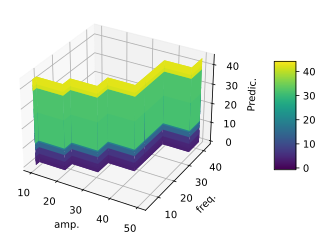

In [36]:
fig = plt.figure(figsize=(18,4))
ax3 = fig.gca(projection='3d', ylabel = 'freq.', xlabel = 'amp.', zlabel='Predic.')
surf = ax3.plot_surface(Y, X, Z, vmin=np.min(z_dim[1,:]), vmax=np.max(z_dim[1,:]),
                        cmap=plt.cm.viridis, linewidth=2)
fig.colorbar(surf, shrink=0.5, aspect=5)

In [37]:
Z_plus = data_df_1d_plus["predictions"]
Z_plus = Z_plus[:, np.newaxis]
print(np.shape(Z_plus))

(100, 1)


 C:\Users\sinad\AppData\Local\Temp\ipykernel_3344\3655662108.py:2: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [38]:
X_plus = data_df_1d_plus["freq."]
Y_plus = data_df_1d_plus["amp."]
print(np.shape(X_plus),'\n',np.shape(Y_plus))

(100,) 
 (100,)


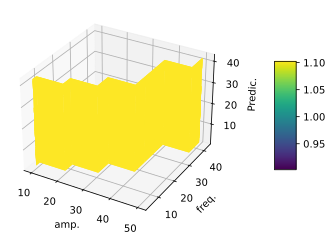

In [39]:
fig = plt.figure(figsize=(18,4))
ax3 = fig.gca(projection='3d', ylabel = 'freq.', xlabel = 'amp.', zlabel='Predic.')
surf = ax3.plot_surface(Y_plus, X_plus, Z_plus, vmin=np.min(Z_plus[1,:]), vmax=np.max(Z_plus[1,:]),
                        cmap=plt.cm.viridis, linewidth=2)
fig.colorbar(surf, shrink=0.5, aspect=5)

#### 5.5.1: 100x100 sampling

In [40]:
OneSD_preStim_gamma100 = np.empty((100,100))
OneSD_preStim_gamma100[:,:] = np.median(sum_preStim_gamma)-np.std(sum_preStim_gamma)

print("The One Std Dev minus median is: ", OneSD_preStim_gamma100[0][0])
np.shape(OneSD_preStim_gamma100)

The One Std Dev minus median is:  0.9084939681688873


(100, 100)

In [41]:
OneSD_preStim_gamma100_plus = np.empty((100,100))
OneSD_preStim_gamma100_plus[:,:] = np.median(sum_preStim_gamma) + np.std(sum_preStim_gamma)

print("The one Std. Dev. plus median is: ", OneSD_preStim_gamma100_plus[0][0])
np.shape(OneSD_preStim_gamma100_plus)

The one Std. Dev. plus median is:  2.938916915638524


(100, 100)

In [42]:
[[5,7,11,17, 23, 35, 42],[10,20,30,40,50]]
np.shape([[11,17, 23, 35, 42],[10,20,30,40,50]])

(2, 5)

#### 5.5.2: Make a 100x100 array of frequencis (5,7 11,17, 23, 35, 42) and amplitudes (0,10,20,30,40,50)


In [43]:
rand_freq = np.random.choice([5,7,11,17, 23, 35, 42], size=(100,100))
rand_freq_sorted = np.sort(rand_freq)
# np.shape(rand_freq)
print(rand_freq_sorted[0:3])
rand_amp = np.random.choice([0,10,20,30,40,50], size=(100, 100))
rand_amp_sorted = np.sort(rand_amp)
print(rand_amp_sorted[0:3])
np.shape(rand_amp_sorted)
# rand_amp
# rand_freq_and_amp = np.random.choice([[11,17, 23, 35, 42],[10,20,30,40,50]], size=(100,100))
# print(rand_freq_and_amp[0:3])

[[ 5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  7  7  7  7  7  7
   7  7  7  7  7  7  7  7  7  7  7 11 11 11 11 11 11 11 11 11 11 11 11 11
  11 17 17 17 17 17 17 17 17 17 17 17 17 17 23 23 23 23 23 23 23 23 23 23
  23 23 23 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 42 42 42 42 42 42
  42 42 42 42]
 [ 5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  7  7  7  7  7  7  7  7  7
   7  7  7  7  7 11 11 11 11 11 11 11 11 11 11 11 17 17 17 17 17 17 17 17
  17 17 17 17 17 17 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
  23 23 23 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 42 42 42 42 42 42
  42 42 42 42]
 [ 5  5  5  5  5  5  5  5  5  5  5  5  7  7  7  7  7  7  7  7  7  7  7  7
   7  7  7  7  7  7  7  7  7 11 11 11 11 11 11 11 11 11 11 11 11 11 17 17
  17 17 17 17 17 17 17 17 17 17 17 17 17 23 23 23 23 23 23 23 23 23 23 23
  23 23 23 23 23 23 35 35 35 35 35 35 35 35 35 35 35 35 35 42 42 42 42 42
  42 42 42 42]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10 10 10 10 1

(100, 100)

In [44]:
testX_100 = np.array([rand_freq_sorted, rand_amp_sorted, OneSD_preStim_gamma100]) #52 , 50
print(np.shape(testX_100))
testX_100 = np.transpose(testX_100)
print(testX_100[50,0:1,:])
np.shape(testX_100)

(3, 100, 100)
[[17.         30.          0.90849397]]


(100, 100, 3)

In [45]:
testX_100_plus = np.array([rand_freq_sorted, rand_amp_sorted, OneSD_preStim_gamma100_plus]) #52 , 50
print(np.shape(testX_100_plus))
testX_100_plus = np.transpose(testX_100_plus)
print(testX_100_plus[50,0:1,:])
np.shape(testX_100_plus)

(3, 100, 100)
[[17.         30.          2.93891692]]


(100, 100, 3)

##### 5.5.3: 100x100 prediction

In [46]:
print(np.arange(100))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [47]:
# TODO: do a loop to go over 100 column vectors and feed the predictor
posteriorTestY_100 = np.empty((100, 100, 100))
simY_100  = np.empty((100, 100, 100))
simMse_100 = np.empty((100, 100, 100))

for s in range(100):
    posteriorTestY_100[:, s:s+1, :] = m.posterior_samples_f(testX_100[s], full_cov=True, size=1)
        # print(np.shape(m.predict(testX)))
    simY_100[:, s, :], simMse_100[:, s, :] = m.predict(testX_100[s])
    
print("mean is: \n",simY_100[0][0][0],"\n\n Variance is: \n", simMse_100[0][0][0])
# posteriorTestY
print(np.shape(posteriorTestY_100),'\n',posteriorTestY_100[0][0][0])

mean is: 
 1.9045184446836174 

 Variance is: 
 15.769218096700076
(100, 100, 100) 
 4.0486924599240215


In [48]:
# TODO: do a loop to go over 100 column vectors and feed the predictor
posteriorTestY_100_plus = np.empty((100, 100, 100))
simY_100_plus  = np.empty((100, 100, 100))
simMse_100_plus = np.empty((100, 100, 100))

for s in range(100):
    posteriorTestY_100_plus[:, s:s+1, :] = m.posterior_samples_f(testX_100_plus[s], full_cov=True, size=1)
        # print(np.shape(m.predict(testX)))
    simY_100_plus[:, s, :], simMse_100_plus[:, s, :] = m.predict(testX_100_plus[s])
    
print("mean is: \n",simY_100_plus[0][0][0],"\n\n Variance is: \n", simMse_100_plus[0][0][0])
# posteriorTestY
print(np.shape(posteriorTestY_100_plus),'\n',posteriorTestY_100_plus[0][0][0])

mean is: 
 3.40039641357896 

 Variance is: 
 15.881409854934635
(100, 100, 100) 
 2.1459523406856817


(100,)


Text(0, 0.5, 'posteriorTestY_plus: ')

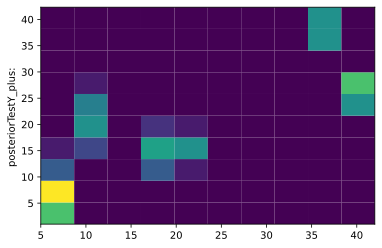

In [49]:
print(np.shape(posteriorTestY_plus))
plt.hist2d(rand_freq_1d_sorted, posteriorTestY_plus,bins=10)
plt.ylabel("posteriorTestY_plus: ")

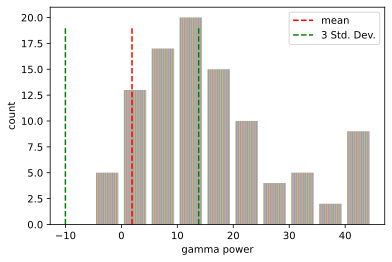

In [50]:
n, bins, patches = plt.hist(posteriorTestY_100[0,:,:], bins=10)
# print(n)
max_n = int(max(n[0,:]))
plt.plot(simY_100[0:max_n, 0, 0], np.arange(0,max_n),'r--')
plt.plot(simY_100[0:max_n, 0, 0] - 3 * simMse_100[0:max_n, 0, 0] ** 0.5, np.arange(0,max_n),'--g')
plt.plot(simY_100[0:max_n, 0, 0] + 3 * simMse_100[0:max_n, 0, 0] ** 0.5, np.arange(0,max_n), '--g')
plt.ylabel("count")
plt.xlabel("gamma power")
plt.legend(["mean","3 Std. Dev."])
plt.show()

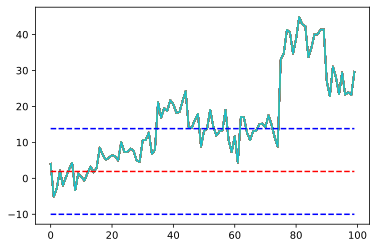

In [51]:
plt.plot(posteriorTestY_100[0,:,:])
plt.plot(simY_100[:, 0, 0], 'r--')
plt.plot(simY_100[:, 0, 0] + 3 * simMse_100[:, 0, 0]** 0.5, 'b--')
plt.plot(simY_100[:, 0, 0] - 3 * simMse_100[:, 0, 0]** 0.5, 'b--')
plt.show()

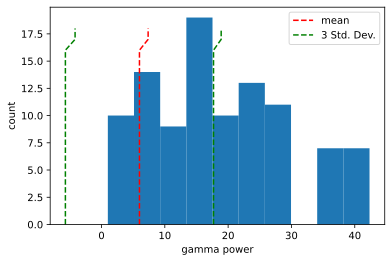

In [52]:
n, bins, patches = plt.hist(posteriorTestY_plus, bins=10)
# print(n)
max_n = int(max(n))
plt.plot(simY_plus[0:max_n, 0], np.arange(0,max_n),'r--')
plt.plot(simY_plus[0:max_n, 0] - 3 * simMse_plus[0:max_n, 0] ** 0.5, np.arange(0,max_n),'--g')
plt.plot(simY_plus[0:max_n, 0] + 3 * simMse_plus[0:max_n, 0] ** 0.5, np.arange(0,max_n), '--g')
plt.ylabel("count")
plt.xlabel("gamma power")
plt.legend(["mean","3 Std. Dev."])
plt.show()

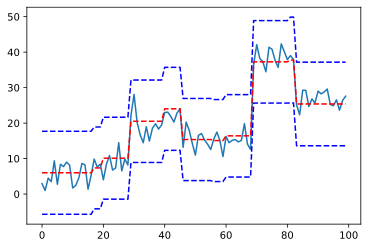

In [53]:
plt.plot(posteriorTestY_plus)
plt.plot(simY_plus[:, 0], 'r--')
plt.plot(simY_plus[:, 0] + 3 * simMse_plus[:, 0]** 0.5, 'b--')
plt.plot(simY_plus[:, 0] - 3 * simMse_plus[:, 0]** 0.5, 'b--')
plt.show()

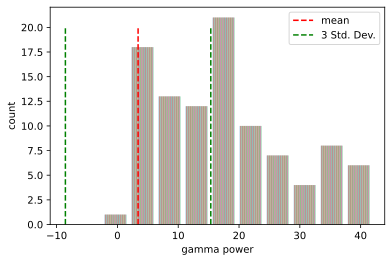

In [54]:
n, bins, patches = plt.hist(posteriorTestY_100_plus[0,:,:], bins=10)
# print(n)
max_n = int(max(n[0,:]))
plt.plot(simY_100_plus[0:max_n, 0, 0], np.arange(0,max_n),'r--')
plt.plot(simY_100_plus[0:max_n, 0, 0] - 3 * simMse_100_plus[0:max_n, 0, 0] ** 0.5, np.arange(0,max_n),'--g')
plt.plot(simY_100_plus[0:max_n, 0, 0] + 3 * simMse_100_plus[0:max_n, 0, 0] ** 0.5, np.arange(0,max_n), '--g')
plt.ylabel("count")
plt.xlabel("gamma power")
plt.legend(["mean","3 Std. Dev."])
plt.show()

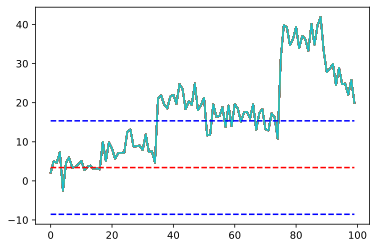

In [55]:
plt.plot(posteriorTestY_100_plus[0,:,:])
plt.plot(simY_100_plus[:, 0, 0], 'r--')
plt.plot(simY_100_plus[:, 0, 0] + 3 * simMse_100_plus[:, 0, 0]** 0.5, 'b--')
plt.plot(simY_100_plus[:, 0, 0] - 3 * simMse_100_plus[:, 0, 0]** 0.5, 'b--')
plt.show()

In [56]:
print(np.shape(testX), np.shape(simY[:,:,0:1]))
print(testX[0,0,:])
freq = np.reshape(testX[:,:,0], (10000,))
print(np.shape(freq),'\n', freq[0])
amp = np.reshape(testX[:,:,1], (10000,))
Stim_gamma = np.reshape(posteriorTestY[:,:,0], (10000,))
mean_predic = np.reshape(simY[:,:,0],(10000,))
# dataset = np.append(freq, amp, Stim_gamma, mean_predic)
# np.shape(dataset)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
sns.set()
# testX_int = np.array(testX[:,0:2,:], dtype = np.int_)
# print(testX_int[0:3,:,:])
# data = np.append(testX[:,:,0:2], posteriorTestY[:,:,0], simY[:,:,0:1], axis=2)
# print(np.shape(data))
# testX[0:3,0:2]
# print(data[0,0,0:3])
data_df = pd.DataFrame(data={"freq.":freq, "amp.":amp})
data_df

In [ ]:
ax = sns.heatmap(data_df)
plt.show()

### 5.2 Sampling one Std. Dev. plus the median